# Proyek Analisis Data: BIKE SHARE DATASET
- **Nama:** Bimantyoso Hamdikatama
- **Email:** bimantyosohamdikatam@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca terhadap jumlah sewa sepeda ?
- Apakah terdapat perbedaan pola peminjaman sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import requests
import zipfile

## Data Wrangling

### Gathering Data

In [ ]:
# URL file ZIP
url_zip = "https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ"

# Mengunduh file ZIP dari URL
response = requests.get(url_zip)
zip_content = response.content

# Menyimpan file ZIP ke sistem file lokal
zip_filename = "data.zip"
with open(zip_filename, "wb") as f:
    f.write(zip_content)

# Membaca file ZIP yang telah disimpan
zip_file = zipfile.ZipFile(zip_filename)

# Mengekstrak file CSV "day.csv" dari dalam file ZIP
day_csv_filename = "day.csv"
zip_file.extract(day_csv_filename)  # Mengekstrak file "day.csv"

# Membaca file CSV "day.csv" yang telah diekstrak
df_day = pd.read_csv(day_csv_filename)

# Menampilkan beberapa baris pertama dari DataFrame "day.csv"
print("Isi file day.csv:")
print(df_day.head())

# Mengekstrak file CSV "hour.csv" dari dalam file ZIP
hour_csv_filename = "hour.csv"
zip_file.extract(hour_csv_filename)  # Mengekstrak file "hour.csv"

# Membaca file CSV "hour.csv" yang telah diekstrak
df_hour = pd.read_csv(hour_csv_filename)

# Menampilkan beberapa baris pertama dari DataFrame "hour.csv"
print("\nIsi file hour.csv:")
print(df_hour.head())

# Jangan lupa untuk menutup file ZIP setelah selesai digunakan
zip_file.close()


### Assessing Data

In [ ]:


# Membaca data dari file CSV
day = pd.read_csv('day.csv')

# Menampilkan beberapa baris pertama dari data
print("Beberapa baris pertama dari data:")
print(day.head())

# Menampilkan informasi umum tentang data
print("\nInformasi umum tentang data:")
print(day.info())

# Menampilkan statistik deskriptif untuk data numerik
print("\nStatistik deskriptif untuk data numerik:")
print(day.describe())

# Menampilkan jumlah nilai yang unik dalam setiap kolom
print("\nJumlah nilai unik dalam setiap kolom:")
print(day.nunique())

# Mengecek nilai yang hilang dalam data
print("\nNilai yang hilang dalam data:")
print(day.isnull().sum())

# Mengecek nilai duplikat dalam data
print("\nJumlah nilai duplikat dalam data:")
print(day.duplicated().sum())

# Melihat tipe data dari setiap kolom
print("\nTipe data dari setiap kolom:")
print(day.dtypes)

In [ ]:

# Membaca data dari file CSV
hour = pd.read_csv('hour.csv')

# Menampilkan beberapa baris pertama dari data
print("Beberapa baris pertama dari data:")
print(hour.head())

# Menampilkan informasi umum tentang data
print("\nInformasi umum tentang data:")
print(hour.info())

# Menampilkan statistik deskriptif untuk data numerik
print("\nStatistik deskriptif untuk data numerik:")
print(hour.describe())

# Menampilkan jumlah nilai yang unik dalam setiap kolom
print("\nJumlah nilai unik dalam setiap kolom:")
print(hour.nunique())

# Mengecek nilai yang hilang dalam data
print("\nNilai yang hilang dalam data:")
print(hour.isnull().sum())

# Mengecek nilai duplikat dalam data
print("\nJumlah nilai duplikat dalam data:")
print(hour.duplicated().sum())

# Melihat tipe data dari setiap kolom
print("\nTipe data dari setiap kolom:")
print(hour.dtypes)

### Cleaning Data

In [7]:
# Mengubah kolom 'dteday' menjadi tipe data tanggal (datetime)

day['dteday'] = pd.to_datetime(day['dteday'])


In [8]:
# Mengubah kolom 'season' menjadi kategorikal
day['season'] = day['season'].astype('category')

# Mengubah kolom 'yr' menjadi kategorikal
day['yr'] = day['yr'].astype('category')

# Mengubah kolom 'mnth' menjadi kategorikal
day['mnth'] = day['mnth'].astype('category')

# Mengubah kolom 'holiday' menjadi kategorikal
day['holiday'] = day['holiday'].astype('category')

# Mengubah kolom 'weekday' menjadi kategorikal
day['weekday'] = day['weekday'].astype('category')

# Mengubah kolom 'workingday' menjadi kategorikal
day['workingday'] = day['workingday'].astype('category')

# Mengubah kolom 'weathersit' menjadi kategorikal
day['weathersit'] = day['weathersit'].astype('category')


In [9]:


hour['dteday'] = pd.to_datetime(hour['dteday'])

In [10]:
# Mengubah kolom 'season' menjadi kategorikal
hour['season'] = hour['season'].astype('category')

# Mengubah kolom 'yr' menjadi kategorikal
hour['yr'] = hour['yr'].astype('category')

# Mengubah kolom 'mnth' menjadi kategorikal
hour['mnth'] = hour['mnth'].astype('category')

# Mengubah kolom 'holiday' menjadi kategorikal
hour['holiday'] = hour['holiday'].astype('category')

# Mengubah kolom 'weekday' menjadi kategorikal
hour['weekday'] = hour['weekday'].astype('category')

# Mengubah kolom 'workingday' menjadi kategorikal
hour['workingday'] = hour['workingday'].astype('category')

# Mengubah kolom 'weathersit' menjadi kategorikal
hour['weathersit'] = hour['weathersit'].astype('category')

In [ ]:
# Memeriksa tipe data kolom 'dteday'
print("Tipe data kolom 'dteday':", day['dteday'].dtype)
print("Tipe data kolom 'dteday':", hour['dteday'].dtype)

# Memeriksa tipe data kolom 'season'
print("Tipe data kolom 'season':", day['season'].dtype)
print("Tipe data kolom 'season':", hour['season'].dtype)

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [35]:
# Baca file CSV
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Mapping untuk kolom season
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Mapping untuk kolom holiday
holiday_mapping = {0: 'libur', 1: 'kerja'}

# Mapping untuk kolom weathersit
weathersit_mapping = {1: 'cerah', 2: 'kabut', 3: 'salju ringan', 4: 'hujan badai'}

# Mengganti nilai pada kolom season, holiday, dan weathersit pada DataFrame day
day_df['season'] = day_df['season'].replace(season_mapping)
day_df['holiday'] = day_df['holiday'].replace(holiday_mapping)
day_df['weathersit'] = day_df['weathersit'].replace(weathersit_mapping)

# Mengganti nilai pada kolom season, holiday, dan weathersit pada DataFrame hour
hour_df['season'] = hour_df['season'].replace(season_mapping)
hour_df['holiday'] = hour_df['holiday'].replace(holiday_mapping)
hour_df['weathersit'] = hour_df['weathersit'].replace(weathersit_mapping)

# Simpan DataFrame yang telah dimodifikasi ke dalam file CSV
day_df.to_csv('day_clean.csv', index=False)
hour_df.to_csv('hour_clean.csv', index=False)


In [39]:
day = pd.read_csv('day_clean.csv')

weathersit_analis = day.iloc[:,[8,13,14,15]]
weathersit_analis.groupby('weathersit').sum()

,casual,registered,cnt
weathersit,,,
cerah,446346,1811606,2257952
kabut,169776,827082,996858
salju ringan,3895,33974,37869


In [40]:
weathersit_4_data = day.loc[day['weathersit'] == 4]

print(weathersit_4_data)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


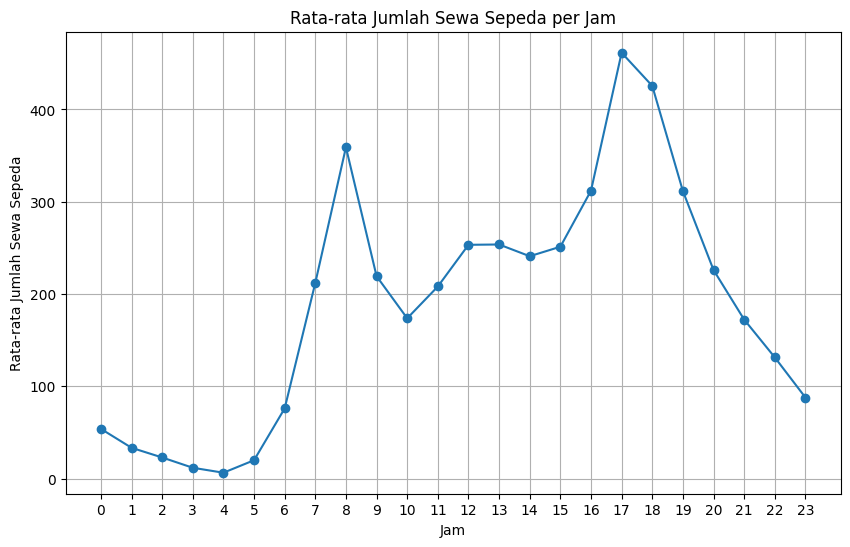


Tabel Pola Harian:
          mean  min  max
hr                      
0    53.898072    2  283
1    33.375691    1  168
2    22.869930    1  132
3    11.727403    1   79
4     6.352941    1   28
5    19.889819    1   66
6    76.044138    1  213
7   212.064649    1  596
8   359.011004    5  839
9   219.309491   14  426
10  173.668501    8  539
11  208.143054   10  663
12  253.315934    3  776
13  253.661180   11  760
14  240.949246   12  750
15  251.233196    7  750
16  311.983562   11  783
17  461.452055   15  976
18  425.510989   23  977
19  311.523352   11  743
20  226.030220   11  567
21  172.314560    6  584
22  131.335165    9  502
23   87.831044    2  256


In [41]:

data = pd.read_csv('hour_clean.csv')

# Ringkasan Statistik
summary = data.describe()

# Visualisasi Pola Harian
hourly_average = data.groupby('hr')['cnt'].mean()


plt.figure(figsize=(10, 6))
hourly_average.plot(kind='line', marker='o', linestyle='-')
plt.title('Rata-rata Jumlah Sewa Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Tabel Pola Harian
hourly_summary = data.groupby('hr')['cnt'].agg(['mean', 'min', 'max'])
print("\nTabel Pola Harian:")
print(hourly_summary)


In [45]:
data = pd.read_csv('hour_clean.csv')

# Menghitung rata-rata jumlah sewa sepeda per jam pada hari kerja (holiday == 1)
weekday_hourly_average = data[data['holiday'] == 'kerja'].groupby('hr')['cnt'].mean()

# Menghitung rata-rata jumlah sewa sepeda per jam pada hari libur (holiday == 0)
holiday_hourly_average = data[data['holiday'] == 'libur'].groupby('hr')['cnt'].mean()

# Menggabungkan kedua data menjadi satu DataFrame
comparison_table = pd.DataFrame({
    'weekday': weekday_hourly_average,
    'Holiday': holiday_hourly_average
})

# Menambahkan kolom untuk membandingkan mana yang lebih banyak
comparison_table['More'] = comparison_table['Holiday'] > comparison_table['weekday']

# Menampilkan tabel perbandingan
print(comparison_table)


       weekday     Holiday   More
hr                               
0    57.476190   53.791489  False
1    38.904762   33.210526  False
2    25.476190   22.791066  False
3    11.611111   11.730486   True
4     5.850000    6.367799   True
5    10.619048   20.169540   True
6    28.285714   77.468750   True
7    82.142857  215.929178   True
8   170.523810  364.617564   True
9   171.190476  220.740793   True
10  203.476190  172.781870  False
11  248.523810  206.941926  False
12  287.142857  252.311174  False
13  298.523810  252.330508  False
14  286.285714  239.604520  False
15  265.142857  250.820621  False
16  272.285714  313.159379   True
17  293.142857  466.437236   True
18  268.761905  430.166902   True
19  221.761905  314.189533   True
20  177.952381  227.458274   True
21  145.095238  173.123055   True
22  108.857143  132.002829   True
23   57.904762   88.719943   True


In [46]:
holiday_analis = day.iloc[:,[5,13,14,15]]
holiday_analis_result = holiday_analis.groupby('holiday').sum()

holiday_analis_result

,casual,registered,cnt
holiday,,,
kerja,22359,56076,78435
libur,597658,2616586,3214244


## Visualization & Explanatory Analysis

### Pertanyaan 1:

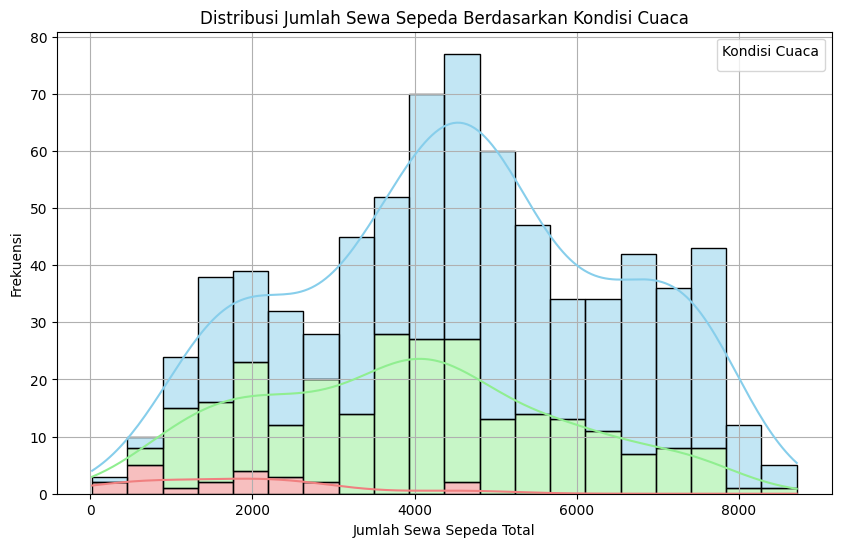

In [48]:
day = pd.read_csv('day.csv')
data = day[['cnt', 'weathersit']]

# Membuat palet warna yang berbeda untuk setiap kondisi cuaca
# Anda dapat menyesuaikan palet warna sesuai preferensi Anda
palette = {1: 'skyblue', 2: 'lightgreen', 3: 'lightcoral', 4: 'orange'}

# Membuat histogram menggunakan Seaborn dengan palet warna yang telah ditentukan
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='cnt', hue='weathersit', bins=20, multiple='stack', kde=True, palette=palette)
plt.xlabel('Jumlah Sewa Sepeda Total')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.legend(title='Kondisi Cuaca', loc='upper right')  # Menambahkan keterangan dan mengatur posisi
plt.grid(True)
plt.show()


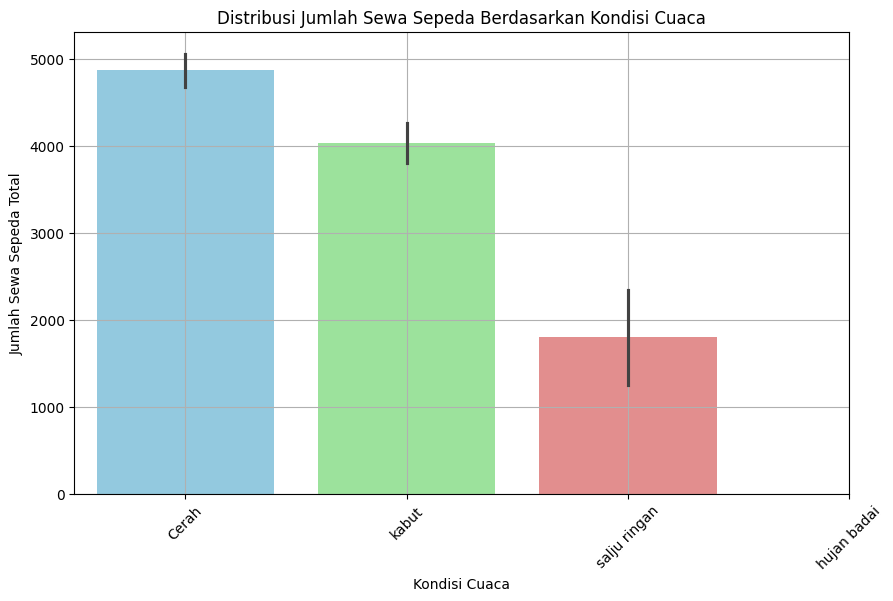

In [51]:
data = day[['cnt', 'weathersit']]

# Membuat palet warna yang berbeda untuk setiap kondisi cuaca
# Anda dapat menyesuaikan palet warna sesuai preferensi Anda
palette = {1: 'skyblue', 2: 'lightgreen', 3: 'lightcoral', 4: 'orange'}

# Membuat bar chart menggunakan Seaborn dengan palet warna yang telah ditentukan
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='weathersit', y='cnt', hue='weathersit', palette=palette, legend=False)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sewa Sepeda Total')
plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'kabut', 'salju ringan', 'hujan badai'], rotation=45)
plt.grid(True)
plt.show()


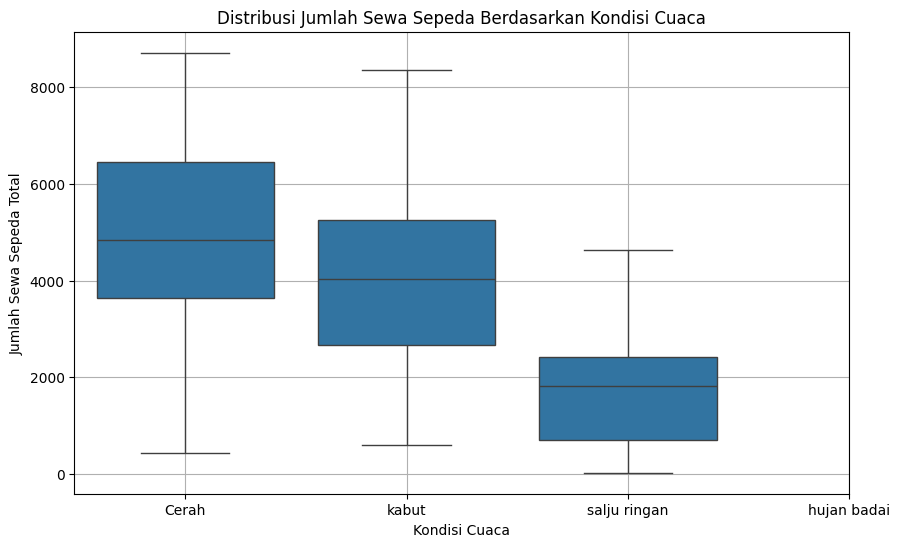

In [52]:
#tambahkan ini

data = day[['cnt', 'weathersit']]

# Membuat boxplot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='weathersit', y='cnt')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sewa Sepeda Total')
plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'kabut', 'salju ringan', 'hujan badai'])
plt.grid(True)
plt.show()

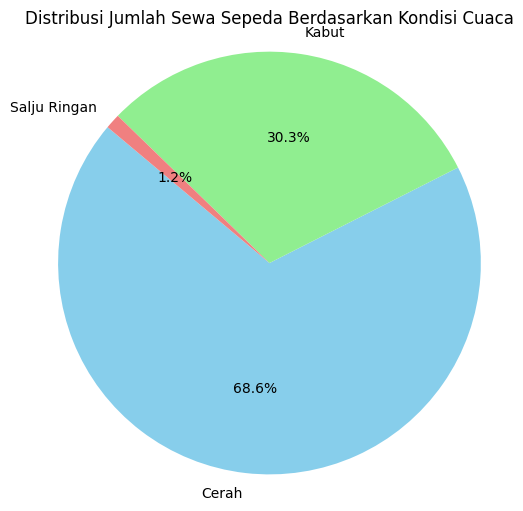

In [53]:

# Menghitung total jumlah sewa sepeda untuk setiap kondisi cuaca
weather_counts = day.groupby('weathersit')['cnt'].sum()

# Menyesuaikan palet warna sesuai preferensi
palette = {1: 'skyblue', 2: 'lightgreen', 3: 'lightcoral', 4: 'orange'}

# Menambahkan keterangan nama untuk setiap kondisi cuaca
weather_labels = {
    1: 'Cerah',
    2: 'Kabut',
    3: 'Salju Ringan',
    4: 'Hujan Badai'
}

# Membuat diagram pie menggunakan Seaborn
plt.figure(figsize=(6, 6))
plt.pie(weather_counts, labels=[weather_labels[i] for i in weather_counts.index], colors=[palette[i] for i in weather_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.axis('equal')
plt.show()


### Pertanyaan 2:

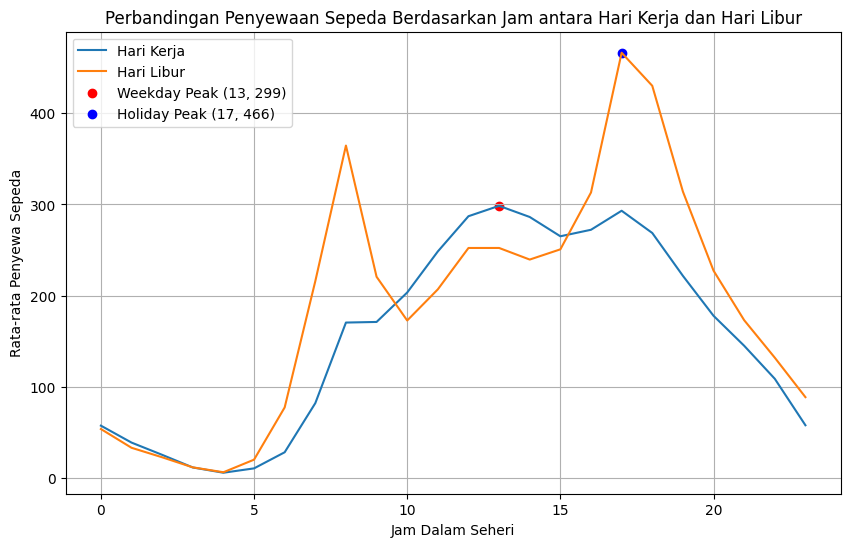

In [25]:
data = pd.read_csv('hour.csv')

# Menghitung rata-rata jumlah sewa sepeda per jam pada hari kerja (holiday == 1)
weekday_hourly_average = data[data['holiday'] == 1].groupby('hr')['cnt'].mean()

# Menghitung rata-rata jumlah sewa sepeda per jam pada hari libur (holiday == 0)
holiday_hourly_average = data[data['holiday'] == 0].groupby('hr')['cnt'].mean()

# Mencari titik puncak untuk hari kerja
weekday_peak_hour = weekday_hourly_average.idxmax()
weekday_peak_value = weekday_hourly_average.max()

# Mencari titik puncak untuk hari libur
holiday_peak_hour = holiday_hourly_average.idxmax()
holiday_peak_value = holiday_hourly_average.max()

# Membuat line chart untuk membandingkan rata-rata jumlah sewa sepeda per jam
plt.figure(figsize=(10, 6))
plt.plot(weekday_hourly_average, label='Hari Kerja')
plt.plot(holiday_hourly_average, label='Hari Libur')
plt.scatter(weekday_peak_hour, weekday_peak_value, color='red', label=f'Weekday Peak ({weekday_peak_hour}, {weekday_peak_value:.0f})')
plt.scatter(holiday_peak_hour, holiday_peak_value, color='blue', label=f'Holiday Peak ({holiday_peak_hour}, {holiday_peak_value:.0f})')
plt.xlabel('Jam Dalam Seheri')
plt.ylabel('Rata-rata Penyewa Sepeda')
plt.title('Perbandingan Penyewaan Sepeda Berdasarkan Jam antara Hari Kerja dan Hari Libur')
plt.legend()
plt.grid(True)
plt.show()


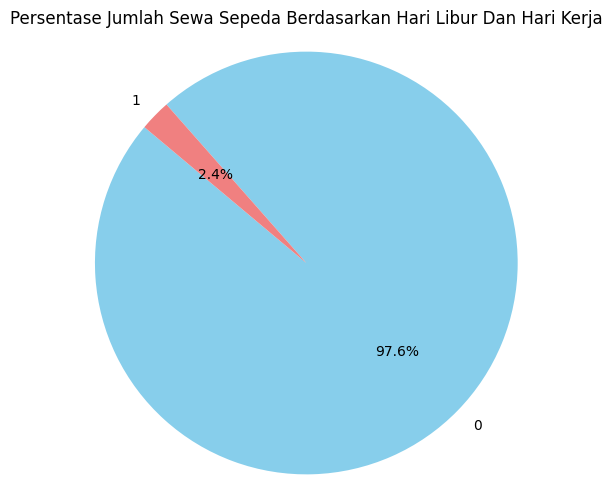

In [26]:
plt.figure(figsize=(6, 6))
plt.pie(holiday_analis_result['cnt'], labels=holiday_analis_result.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Persentase Jumlah Sewa Sepeda Berdasarkan Hari Libur Dan Hari Kerja')
plt.axis('equal')
plt.show()


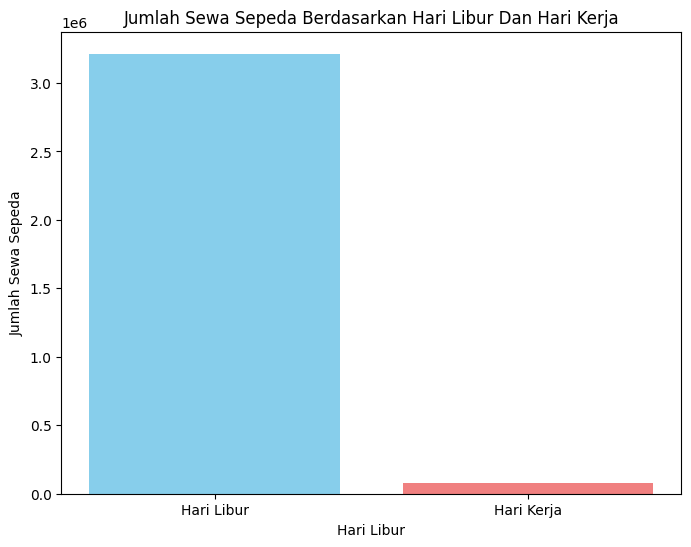

In [27]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt

# Membuat diagram bar chart
plt.figure(figsize=(8, 6))
plt.bar(holiday_analis_result.index, holiday_analis_result['cnt'], color=['skyblue', 'lightcoral'])
plt.title('Jumlah Sewa Sepeda Berdasarkan Hari Libur Dan Hari Kerja')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(holiday_analis_result.index, ['Hari Libur', 'Hari Kerja'])
plt.show()


## Conclusion

Bagaimana pengaruh faktor cuaca terhadap jumlah sewa sepeda?

1. Berdasarkan analisis distribusi jumlah sewa sepeda berdasarkan faktor cuaca, terlihat bahwa:
*   Pada kondisi cuaca yang cerah (Clear), jumlah sewa sepeda cenderung lebih tinggi dibandingkan dengan kondisi cuaca lainnya.
*   Kondisi cuaca dengan kabut (Mist) memiliki jumlah sewa sepeda yang sedang.

*   Jumlah sewa sepeda pada kondisi cuaca hujan ringan atau salju (Light Snow) dan hujan deras (Heavy Rain) cenderung lebih rendah daripada pada kondisi cuaca yang cerah.

Dengan demikian, dapat disimpulkan bahwa faktor cuaca mempengaruhi jumlah sewa sepeda, dimana cuaca yang cerah cenderung meningkatkan persewaan sepeda.


---


Apakah terdapat perbedaan pola peminjaman sepeda antara hari kerja dan hari libur?


*   Berdasarkan analisis persentase jumlah sewa sepeda berdasarkan hari libur dan hari kerja, terlihat bahwa jumlah sewa sepeda cenderung lebih tinggi pada hari libur daripada pada hari kerja.
*  Dapat dilihat juga bahwa jumlah rata rata penyewa sepeda perjam lebih banyak pada hari libur dibandingkan dengan hari kerja.

Dengan demikian, dapat disimpulkan bahwa faktor cuaca dan hari dalam seminggu mempengaruhi jumlah sewa sepeda, dan pola peminjaman sepeda berbeda antara hari kerja dan hari libur.


